### Movielens Project
#### Performing an EDA and feature engineering on the movielens dataset,using the following packages.

In [1]:
#importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### •	Import the three datasets

In [2]:
#Movies.dat
#loading the movies.dat file into movies_df variable
#Format - MovieID::Title::Genres

movies_df = pd.read_csv(
    'movies.dat',
    sep='::',
    names=['MovieID','Title','Genres'],
    header=None,
    encoding='latin-1'
)

#users.dat
#loading the users.dat file into users_df variable
#Format -  UserID::Gender::Age::Occupation::Zip-code

users_df = pd.read_csv(
    'users.dat',
    sep='::',
    names=['UserID','Gender','Age', 'Occupation', 'zip-code'],
    header=None,
    encoding='latin-1'
)

#Ratings.dat
#loading the ratings.dat file into ratings_df variable
#Format - UserID::MovieID::Rating::Timestamp

ratings_df = pd.read_csv(
    'ratings.dat',
    sep='::',
    names=['UserID','MovieID','Rating', 'Timestamp'],
    parse_dates=['Timestamp'],
    header=None
)

In [3]:
#printing the top 5 rows of the movies_df dataset 
movies_df.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
# printing the short summary of the dataset movies_df
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   MovieID  3883 non-null   int64 
 1   Title    3883 non-null   object
 2   Genres   3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [5]:
#printing the top 5 rows of the users_df dataset  
users_df.head()

,UserID,Gender,Age,Occupation,zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [6]:
# printing the short summary of the dataset movies_df
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6040 non-null   int64 
 1   Gender      6040 non-null   object
 2   Age         6040 non-null   int64 
 3   Occupation  6040 non-null   int64 
 4   zip-code    6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [7]:
#printing the top 5 rows of the movies_df dataset 
ratings_df.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [8]:
# printing the short summary of the dataset movies_df
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   UserID     1000209 non-null  int64 
 1   MovieID    1000209 non-null  int64 
 2   Rating     1000209 non-null  int64 
 3   Timestamp  1000209 non-null  object
dtypes: int64(3), object(1)
memory usage: 30.5+ MB


### •	Create a new dataset [Master_Data] with the following columns MovieID Title UserID Age Gender Occupation Rating. (Hint: (i) Merge two tables at a time. (ii) Merge the tables using two primary keys MovieID & UserId)

In [9]:
#combining the movies_df dataset and ratings_df dataset on the common variable "MovieID"
First_merge = pd.merge(movies_df,ratings_df,on='MovieID')
First_merge.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474


In [10]:
#now combining the first_merge dataset and users_df dataset on the common variable "UserID"
second_merge = pd.merge(users_df,First_merge,on='UserID')
second_merge.head()

,UserID,Gender,Age,Occupation,zip-code,MovieID,Title,Genres,Rating,Timestamp
0,1,F,1,10,48067,1,Toy Story (1995),Animation|Children's|Comedy,5,978824268
1,1,F,1,10,48067,48,Pocahontas (1995),Animation|Children's|Musical|Romance,5,978824351
2,1,F,1,10,48067,150,Apollo 13 (1995),Drama,5,978301777
3,1,F,1,10,48067,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,4,978300760
4,1,F,1,10,48067,527,Schindler's List (1993),Drama|War,5,978824195


In [11]:
#drop the zipcode and timestamp
master_data = second_merge.drop(['zip-code','Timestamp'],axis=1) #axis=1 means columns
master_data.head()

,UserID,Gender,Age,Occupation,MovieID,Title,Genres,Rating
0,1,F,1,10,1,Toy Story (1995),Animation|Children's|Comedy,5
1,1,F,1,10,48,Pocahontas (1995),Animation|Children's|Musical|Romance,5
2,1,F,1,10,150,Apollo 13 (1995),Drama,5
3,1,F,1,10,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,4
4,1,F,1,10,527,Schindler's List (1993),Drama|War,5


### The second_merge file has the desired variables as per question2

In [12]:
#Explore the datasets using visual representations (graphs or tables), also include your comments on the following:
#User Age Distribution
users_df['Age'].value_counts()

25    2096
35    1193
18    1103
45     550
50     496
56     380
1      222
Name: Age, dtype: int64

Text(0.5, 1.0, 'Distribution of Age')

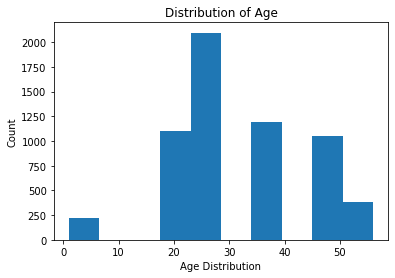

In [13]:
#creating a histogram for all unique ages:
plt.hist(users_df['Age'])          #using the "Age" column that is in users_df to plot histogram
plt.xlabel('Age Distribution')     #nameing the x axis as "Age Distribution"
plt.ylabel('Count')                #nameing the y axis as "Count"
plt.title('Distribution of Age')   #giving the title to the histogram as "Distribution of Age"

In [14]:
#2.User rating of the movie “Toy Story”
#grouping the movie titles in the title column and storing the dataset into a variable "group"
group = First_merge.groupby('Title')

In [15]:
#printing the top 5 and bottom 5 rows of dataset group
group.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474
...,...,...,...,...,...,...
999821,3952,"Contender, The (2000)",Drama|Thriller,23,4,978461000
999822,3952,"Contender, The (2000)",Drama|Thriller,36,5,978062904
999823,3952,"Contender, The (2000)",Drama|Thriller,52,4,977947102
999824,3952,"Contender, The (2000)",Drama|Thriller,72,5,977868330


In [16]:
#storing the data of movie Toy Story(1995) into variable "toy_story"
toy_story= group.get_group('Toy Story (1995)')

In [17]:
#printing the top 5 row of the dataset toy_story
toy_story.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474


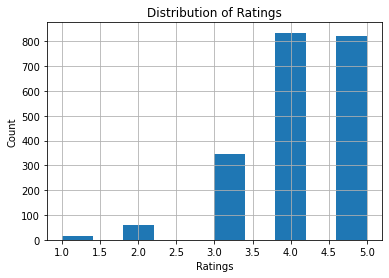

In [18]:
#ploting histogram to display the ratings for the movie "Toy Story(1995)"
toy_story['Rating'].hist()             #using the dataset toy_story to create the histofram plot
plt.title('Distribution of Ratings')   #giving the title for the plot as "Distribution of Ratings"
plt.xlabel('Ratings')                  #nameing the x axis as "Ratings"
plt.ylabel('Count')                    #nameing the y axis as "Count"
plt.show()                             #plt.show() is used to show the plot permanently

In [19]:
#3.	Top 25 movies by viewership rating
average_rating = First_merge.groupby('Title')['Rating'].mean()
average_rating.head(2)

Title
$1,000,000 Duck (1971)    3.027027
'Night Mother (1986)      3.371429
Name: Rating, dtype: float64

In [20]:
#to find movies with highest ratings
average_rating = average_rating.sort_values(ascending=False)
average_rating.head(25)

Title
Ulysses (Ulisse) (1954)                                                5.000000
Lured (1947)                                                           5.000000
Follow the Bitch (1998)                                                5.000000
Bittersweet Motel (2000)                                               5.000000
Song of Freedom (1936)                                                 5.000000
One Little Indian (1973)                                               5.000000
Smashing Time (1967)                                                   5.000000
Schlafes Bruder (Brother of Sleep) (1995)                              5.000000
Gate of Heavenly Peace, The (1995)                                     5.000000
Baby, The (1973)                                                       5.000000
I Am Cuba (Soy Cuba/Ya Kuba) (1964)                                    4.800000
Lamerica (1994)                                                        4.750000
Apple, The (Sib) (1998)           

In [21]:
#4.	Find the ratings for all the movies reviewed by for a particular user of user id = 2696
rattings_all_2696 = second_merge[second_merge['UserID']==2696]

In [22]:
#printing the dataset rattings_all_2696
rattings_all_2696

,UserID,Gender,Age,Occupation,zip-code,MovieID,Title,Genres,Rating,Timestamp
440667,2696,M,25,7,24210,350,"Client, The (1994)",Drama|Mystery|Thriller,3,973308886
440668,2696,M,25,7,24210,800,Lone Star (1996),Drama|Mystery,5,973308842
440669,2696,M,25,7,24210,1092,Basic Instinct (1992),Mystery|Thriller,4,973308886
440670,2696,M,25,7,24210,1097,E.T. the Extra-Terrestrial (1982),Children's|Drama|Fantasy|Sci-Fi,3,973308690
440671,2696,M,25,7,24210,1258,"Shining, The (1980)",Horror,4,973308710
440672,2696,M,25,7,24210,1270,Back to the Future (1985),Comedy|Sci-Fi,2,973308676
440673,2696,M,25,7,24210,1589,Cop Land (1997),Crime|Drama|Mystery,3,973308865
440674,2696,M,25,7,24210,1617,L.A. Confidential (1997),Crime|Film-Noir|Mystery|Thriller,4,973308842
440675,2696,M,25,7,24210,1625,"Game, The (1997)",Mystery|Thriller,4,973308842
440676,2696,M,25,7,24210,1644,I Know What You Did Last Summer (1997),Horror|Mystery|Thriller,2,973308920


In [23]:
#1.	Find out all the unique genres 
#(Hint: split the data in column genre making a list and then process the data to find out 
#only the unique categories of genres)
First_merge['Genres'].value_counts().head(10)

Comedy                     116883
Drama                      111423
Comedy|Romance              42712
Comedy|Drama                42245
Drama|Romance               29170
Action|Thriller             26759
Horror                      22563
Drama|Thriller              18248
Thriller                    17851
Action|Adventure|Sci-Fi     17783
Name: Genres, dtype: int64

In [24]:
#printing the all unique genres in the dataset
First_merge['Genres'].unique()

array(["Animation|Children's|Comedy", "Adventure|Children's|Fantasy",
       'Comedy|Romance', 'Comedy|Drama', 'Comedy',
       'Action|Crime|Thriller', "Adventure|Children's", 'Action',
       'Action|Adventure|Thriller', 'Comedy|Drama|Romance',
       'Comedy|Horror', "Animation|Children's", 'Drama',
       'Action|Adventure|Romance', 'Drama|Thriller', 'Drama|Romance',
       'Thriller', 'Action|Comedy|Drama', 'Crime|Drama|Thriller',
       'Drama|Sci-Fi', 'Romance', 'Adventure|Sci-Fi', 'Adventure|Romance',
       "Children's|Comedy|Drama", 'Documentary', 'Drama|War',
       'Action|Crime|Drama', 'Action|Adventure', 'Crime|Thriller',
       "Animation|Children's|Musical|Romance", "Children's|Comedy",
       'Drama|Mystery', 'Sci-Fi|Thriller',
       'Action|Comedy|Crime|Horror|Thriller', 'Drama|Musical',
       'Crime|Drama|Romance', 'Adventure|Drama', 'Action|Thriller',
       "Adventure|Children's|Comedy|Musical", 'Action|Drama|War',
       'Action|Adventure|Crime', 'Crime', 'Drama

In [25]:
#2.	Create a separate column for each genre category with a one-hot encoding ( 1 and 0) 
#whether or not the movie belongs to that genre. 
genrecol =First_merge['Genres']
genre= genrecol.str.get_dummies().add_prefix('NEW')   #using the 'NEW' to identify the dummy columns that have created

In [26]:
#printing the value of the variable genrecol
genrecol.head()

0    Animation|Children's|Comedy
1    Animation|Children's|Comedy
2    Animation|Children's|Comedy
3    Animation|Children's|Comedy
4    Animation|Children's|Comedy
Name: Genres, dtype: object

In [27]:
First_merge.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474


In [28]:
#combining the First_merge and genre datasets
final_data = pd.concat([First_merge,genre],axis=1)

In [29]:
#printing the top 5 rows of the final_data
final_data.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,NEWAction,NEWAdventure,NEWAnimation,NEWChildren's,...,NEWFantasy,NEWFilm-Noir,NEWHorror,NEWMusical,NEWMystery,NEWRomance,NEWSci-Fi,NEWThriller,NEWWar,NEWWestern
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [30]:
#printing the only lhte columns of the dataset final_data
final_data.columns

Index(['MovieID', 'Title', 'Genres', 'UserID', 'Rating', 'Timestamp',
       'NEWAction', 'NEWAdventure', 'NEWAnimation', 'NEWChildren's',
       'NEWComedy', 'NEWCrime', 'NEWDocumentary', 'NEWDrama', 'NEWFantasy',
       'NEWFilm-Noir', 'NEWHorror', 'NEWMusical', 'NEWMystery', 'NEWRomance',
       'NEWSci-Fi', 'NEWThriller', 'NEWWar', 'NEWWestern'],
      dtype='object')

In [31]:
#creating the final_data.csv file by using the function .to_csv()
final_data.to_csv('final_data.csv')

In [32]:
#printing only the columns of the master_data
master_data.columns

Index(['UserID', 'Gender', 'Age', 'Occupation', 'MovieID', 'Title', 'Genres',
       'Rating'],
      dtype='object')

In [33]:
#4.Develop an appropriate model to predict the movie ratings
#importing the required library file to create a model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [34]:
#seperating the data X and y variable to train the model
X = final_data.drop(['Rating','Title','MovieID','UserID','Timestamp','Genres'],axis=1)
y= final_data['Rating']

In [35]:
#printing the columns of X variable 
X.columns

Index(['NEWAction', 'NEWAdventure', 'NEWAnimation', 'NEWChildren's',
       'NEWComedy', 'NEWCrime', 'NEWDocumentary', 'NEWDrama', 'NEWFantasy',
       'NEWFilm-Noir', 'NEWHorror', 'NEWMusical', 'NEWMystery', 'NEWRomance',
       'NEWSci-Fi', 'NEWThriller', 'NEWWar', 'NEWWestern'],
      dtype='object')

In [36]:
#seperating the data for training and testing
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

In [37]:
#LinearRegression() is used to create the model 
linear_reg=LinearRegression()

In [38]:
linear_reg.fit(X_train,y_train)

LinearRegression()

In [39]:
#predictions
y_pred= linear_reg.predict(X_test)

In [40]:
#to find the most important features
linear_reg.coef_

array([-0.10259894,  0.01484072,  0.36292453, -0.3215857 , -0.01624118,
        0.09633733,  0.40940027,  0.23650902,  0.06420402,  0.4467839 ,
       -0.28896811,  0.16319447,  0.01412358, -0.00614819, -0.02582426,
        0.05733083,  0.29962257,  0.12561833])

In [41]:
#importing r2_score from sklearn.metrics
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(r2)

0.03663219284398367


In [42]:
#3.	Determine the features affecting the ratings of any particular movie.
data=pd.DataFrame(master_data)

In [43]:
#printing short summary of the dataset data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 8 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   UserID      1000209 non-null  int64 
 1   Gender      1000209 non-null  object
 2   Age         1000209 non-null  int64 
 3   Occupation  1000209 non-null  int64 
 4   MovieID     1000209 non-null  int64 
 5   Title       1000209 non-null  object
 6   Genres      1000209 non-null  object
 7   Rating      1000209 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 68.7+ MB


In [44]:
print(data.corr()) #pearson correlation coefficient

              UserID       Age  Occupation   MovieID    Rating
UserID      1.000000  0.034688   -0.026698 -0.017739  0.012303
Age         0.034688  1.000000    0.078371  0.027575  0.056869
Occupation -0.026698  0.078371    1.000000  0.008585  0.006753
MovieID    -0.017739  0.027575    0.008585  1.000000 -0.064042
Rating      0.012303  0.056869    0.006753 -0.064042  1.000000
